In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from utils import loader
from utils import debugger 
from utils import preprocessing as pp 
from utils import misc
from utils import jet_num_handler
import implementations as impl
import cost

In [3]:
error_value = -999.0
seed = 114

## Load the training data into feature matrix, class labels, and event ids:

In [6]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)

nb_samples = x.shape[0]
nb_features = x.shape[1]

### Preprocessing

In [7]:
# Cleaned input array by replacing errors with most frequent values
x_clean_mf = pp.clean_data(x, error_value, pp.most_frequent)

# Cleaned input array by replacing errors with mean
x_clean_mean = pp.clean_data(x, error_value, np.mean)

# Cleaned input array by replacing errors with median
x_clean_median = pp.clean_data(x, error_value, np.median)

In [8]:
# Chosen cleaned data
x_clean = x_clean_mean

In [9]:
# Normalised version of the data (without the 1's column)
x_normal = pp.normalise(x_clean)
x_normal.shape

(250000, 30)

In [10]:
# Compute tx : column of ones followed by x
first_col = np.ones((nb_samples, 1))
tx = np.concatenate((first_col, x_normal), axis=1)
tx.shape

(250000, 31)

In [11]:
w_across_impl = {}

In [12]:
# Test for Gradient Descent Least squares.

# Define the parameters of the algorithm.
max_iters = 0
gamma = 10e-2

# Initialization
w_initial = np.ones((31,))

# Debugger
dbg = debugger.Debugger(['loss', 'w', 'gamma'])

# Start gradient descent.
w, loss = impl.least_squares_GD(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=True)

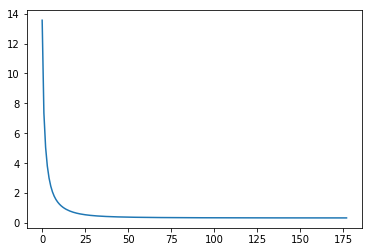

step 1/178:	loss: 13.555943469391611
step 2/178:	loss: 7.3603825762306005
step 3/178:	loss: 5.060731201855267
step 4/178:	loss: 3.806694374515263
step 5/178:	loss: 3.008033363999302
step 6/178:	loss: 2.4645089161763982
step 7/178:	loss: 2.0780104329588904
step 8/178:	loss: 1.7927315744783192
step 9/178:	loss: 1.5751198298678446
step 10/178:	loss: 1.4043454292327961
step 11/178:	loss: 1.2670993468862424
step 12/178:	loss: 1.1546212092540815
step 13/178:	loss: 1.0609648005609917
step 14/178:	loss: 0.9819683517080393
step 15/178:	loss: 0.9146320346578631
step 16/178:	loss: 0.8567338961878957
step 17/178:	loss: 0.8065875015599875
step 18/178:	loss: 0.7628852438737783
step 19/178:	loss: 0.7245944418283786
step 20/178:	loss: 0.6908866593055718
step 21/178:	loss: 0.6610884087947146
step 22/178:	loss: 0.6346459438444267
step 23/178:	loss: 0.6110995546624822
step 24/178:	loss: 0.5900644224365656
step 25/178:	loss: 0.5712161003887176
step 26/178:	loss: 0.5542793260817185
step 27/178:	loss: 0.539

In [13]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('-------------------------')
dbg.print('gamma', last_n=0)
w_across_impl['GD_LS'] = w

In [14]:
# Test for Stochastic Gradient Descent Least squares.

# clear debugger
dbg.clear()

# Define the parameters of the algorithm.
max_iters = 200
gamma = 10e-3

# Initialization
w_initial = np.ones((31,))

# Start gradient descent.
w, loss = impl.least_squares_SGD(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=False)

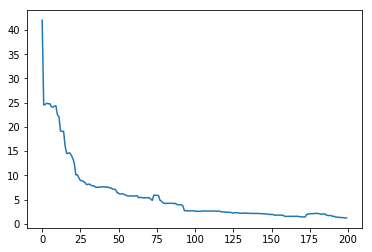

step 1/200:	loss: 41.99965855049423
step 2/200:	loss: 24.488153985518583
step 3/200:	loss: 24.653331176499563
step 4/200:	loss: 24.87996275340182
step 5/200:	loss: 24.76266496016536
step 6/200:	loss: 24.78791418244151
step 7/200:	loss: 24.151458245703893
step 8/200:	loss: 24.078464806724035
step 9/200:	loss: 24.29642340113594
step 10/200:	loss: 24.336474073511745
step 11/200:	loss: 22.467994436088684
step 12/200:	loss: 22.09150903136355
step 13/200:	loss: 19.1382134659751
step 14/200:	loss: 19.082479272103363
step 15/200:	loss: 19.092494443914617
step 16/200:	loss: 16.07610642885896
step 17/200:	loss: 14.514379398661951
step 18/200:	loss: 14.579405624736609
step 19/200:	loss: 14.641485909629642
step 20/200:	loss: 14.167452012223055
step 21/200:	loss: 13.536028863943962
step 22/200:	loss: 12.515869911468801
step 23/200:	loss: 10.107849440025843
step 24/200:	loss: 10.141040131780368
step 25/200:	loss: 9.49761445007955
step 26/200:	loss: 8.929944599715098
step 27/200:	loss: 8.924744024396

In [15]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('-------------------------')
dbg.print('gamma', last_n=0)
w_across_impl['SGD_LS'] = w

In [17]:
# Test for Least squares with normal equations.
w, loss = impl.least_squares(y, tx)

In [18]:
print('loss:', loss)
w_across_impl['NE_LS'] = w
print(np.linalg.norm(w))

loss: 0.340409452161906
440.81584456731656


In [19]:
eps = 1000
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between GD_LS and SGD_LS is 1.8227946772554986
Error between GD_LS and NE_LS is 440.64244918920446
Error between NE_LS and SGD_LS is 440.6466806833583

Norm of w: 440.81584456731656


## Logistic regression test

In [26]:
np.random.seed(114)

# Random guess 
w = np.random.uniform(0,1,size=nb_features)     
z_ = cost.sigmoid(x_normal @ w)
y_ = misc.map_prediction(z_)

print(misc.accuracy(y, y_))

0.584672


In [29]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 300
gamma = 1e-7

# Initialization
nb_features = tx.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w', 'gamma'])

w, loss = impl.logistic_regression(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=True)

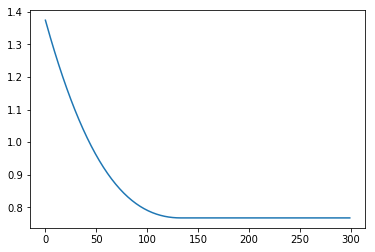

step 1/300:	loss: 1.3743750778645714
step 2/300:	loss: 1.3631866850279228
step 3/300:	loss: 1.3521214021572576
step 4/300:	loss: 1.3411790535888088
step 5/300:	loss: 1.3303578047668754
step 6/300:	loss: 1.3196608354868415
step 7/300:	loss: 1.3090838035804826
step 8/300:	loss: 1.298630102166176
step 9/300:	loss: 1.2882982449106937
step 10/300:	loss: 1.2780870279660834
step 11/300:	loss: 1.2679953693932087
step 12/300:	loss: 1.2580273900852879
step 13/300:	loss: 1.2481781909188696
step 14/300:	loss: 1.2384496960434885
step 15/300:	loss: 1.2288405569312641
step 16/300:	loss: 1.2193507594279172
step 17/300:	loss: 1.2099791727319111
step 18/300:	loss: 1.2007280670522666
step 19/300:	loss: 1.1915943976267447
step 20/300:	loss: 1.1825783297501484
step 21/300:	loss: 1.173680731630397
step 22/300:	loss: 1.1648998077078527
step 23/300:	loss: 1.1562358029428943
step 24/300:	loss: 1.1476888818829558
step 25/300:	loss: 1.1392573924743692
step 26/300:	loss: 1.1309426104024285
step 27/300:	loss: 1.12

In [30]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('------------------')
dbg.print('gamma', last_n=0)
w_across_impl['LR'] = w

In [33]:
y_ = misc.map_prediction(misc.lr_output(tx, w))
print(misc.accuracy(y, y_))

0.698564


In [38]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 300
gamma = 1e-7
lambda_ = 1e-7

# Initialization
nb_features = tx.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w', 'gamma'])

w, loss = impl.reg_logistic_regression(y, tx, lambda_, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=True)

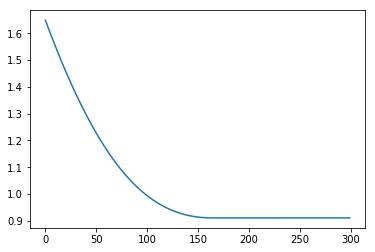

step 1/300:	loss: 1.6483146779394
step 2/300:	loss: 1.638070940384713
step 3/300:	loss: 1.6278957843709325
step 4/300:	loss: 1.6177943628447697
step 5/300:	loss: 1.6077633336366202
step 6/300:	loss: 1.5978040945735772
step 7/300:	loss: 1.5879164120135851
step 8/300:	loss: 1.578100065566894
step 9/300:	loss: 1.568356164303564
step 10/300:	loss: 1.5586848290817794
step 11/300:	loss: 1.5490835003305774
step 12/300:	loss: 1.5395589725818797
step 13/300:	loss: 1.5301084745223983
step 14/300:	loss: 1.5207280205586207
step 15/300:	loss: 1.5114207539940665
step 16/300:	loss: 1.5021917364822603
step 17/300:	loss: 1.4930366876183399
step 18/300:	loss: 1.48395526019996
step 19/300:	loss: 1.4749472069206795
step 20/300:	loss: 1.4660159487530589
step 21/300:	loss: 1.4571609089119468
step 22/300:	loss: 1.4483755763445945
step 23/300:	loss: 1.4396697586710496
step 24/300:	loss: 1.4310357447061917
step 25/300:	loss: 1.422483084873877
step 26/300:	loss: 1.4140027273176545
step 27/300:	loss: 1.405599891

In [39]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('------------------')
dbg.print('gamma', last_n=0)
w_across_impl['RLR'] = w

In [40]:
eps = 1000
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between GD_LS and SGD_LS is 1.8227946772554986
Error between GD_LS and NE_LS is 440.64244918920446
Error between GD_LS and LR is 2.472966185412844
Error between GD_LS and RLR is 3.3421665343864886
Error between NE_LS and SGD_LS is 440.6466806833583
Error between NE_LS and RLR is 440.8524456162927
Error between LR and SGD_LS is 2.853413681534433
Error between LR and NE_LS is 440.522273422285
Error between LR and RLR is 1.5387666468477792
Error between RLR and SGD_LS is 3.4851580866207392

Norm of w: 3.770358968600738
